In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data import *
from perceptron import Perceptron

# Homework 1 Solutions

## Download data

In [2]:
def filter_data(X, y, labels):
    mask = (y[:,None]==np.array(labels)).any(axis=1)
    X = X[mask]
    y = y[mask]
    return X[:500],  y[:500]

def binary_clf_mnist_data():
    maybe_download('train-images-idx3-ubyte.gz')
    maybe_download('train-labels-idx1-ubyte.gz')
    maybe_download('t10k-images-idx3-ubyte.gz')
    maybe_download('t10k-labels-idx1-ubyte.gz')

    # Extract it into np arrays.
    X_train = extract_data('train-images-idx3-ubyte.gz')
    y_train = extract_labels('train-labels-idx1-ubyte.gz')
    X_test = extract_data('t10k-images-idx3-ubyte.gz')
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz')
    
    X_train, y_train = filter_data(X_train, y_train, [3,8])
    X_test, y_test = filter_data(X_test, y_test, [3,8])

    y_train = (y_train==3)*1 + (y_train==8)*(-1)
    y_test = (y_test==3)*1 + (y_test==8)*(-1)    
    return X_train, y_train, X_test, y_test

def plot_image_grid(images, fig_title, scale_img=1, image_min=None, image_max=None):
    n_images = len(images)
    n_dim = int(np.sqrt(n_images))

    if (image_min is None) or (image_max is None):
        image_min = np.nanmin(images)
        image_max = np.nanmax(images)
    
    fig, axes = plt.subplots(n_dim, n_dim, figsize=(scale_img*n_dim, scale_img*n_dim))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=plt.get_cmap('gray'), interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle(fig_title, y=1.05, fontsize=14)

    fig.tight_layout()
    fig_title = fig_title.replace(' ', '_')
    #plt.savefig("./results/{}.png".format(fig_title), bbox_inches = "tight")
    plt.show()
    plt.close()

## Grid

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


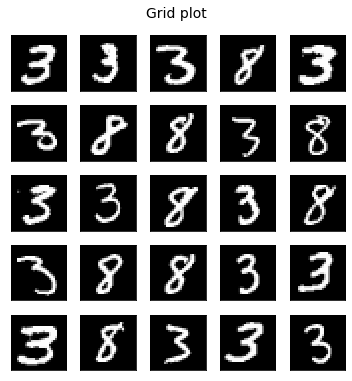

In [3]:
X_train, y_train, X_test, y_test = binary_clf_mnist_data()
grid_data = X_train[:25].reshape(25, 28, 28)
plot_image_grid(grid_data, fig_title='Grid plot')

In [4]:
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (500, 784)
y_train.shape (500,)
X_test.shape (500, 784)
y_test.shape (500,)


## Histogram

(array([262.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 238.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

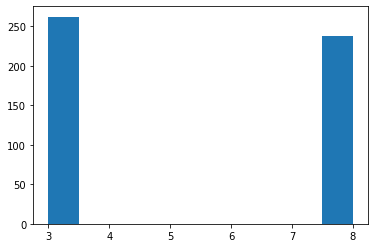

In [5]:
plt.hist((y_train==1)*3 + (y_train==-1)*8)

## Perceptron

In [6]:
clf = Perceptron(784)
clf.train(X_train, y_train, X_test, y_test, 1000)

In [7]:
def plot_trajectories(trajectories, xlabel, ylabel, 
                         y_min=None, y_max=None, y_obj=None, fig_title='plot'):
    fig, ax = plt.subplots(figsize=(7., 4.)) #4
    
    for key in trajectories.keys():
        trajectory = trajectories[key]
        x = np.array(range(len(trajectory)))
        sc = sns.lineplot(x=x, y=trajectory, label=key)
    sc.set_xlabel(xlabel)
    sc.set_ylabel(ylabel)
    plt.title(fig_title, fontsize=14)

    if (y_min is not None) and (y_max is not None):
        ax.set_ylim([y_min, y_max])

    # save figure
    plt.grid()
    file = fig_title.lower().replace(' ', '_')
    file = './results/{}'.format(file)
    #plt.savefig(file, bbox_inches = "tight", dpi=200)
    plt.show()
    plt.close()

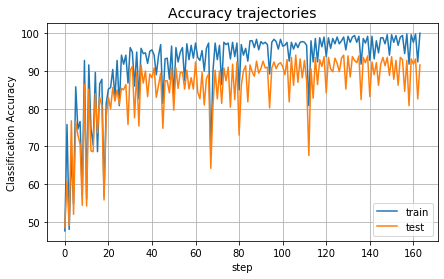

In [8]:
plot_trajectories(trajectories=clf.trajectories,
                  xlabel='step', ylabel='Classification Accuracy', fig_title='Accuracy trajectories')